# Wine Quality Prediction

## Import and Explore Data

In [1]:
wine <- read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"), header = TRUE, sep = ";") 

head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [2]:
t(do.call(cbind, lapply(wine, summary)))

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
fixed.acidity,4.60000,7.1000,7.90000,8.31963727,9.200000,15.90000
volatile.acidity,0.12000,0.3900,0.52000,0.52782051,0.640000,1.58000
citric.acid,0.00000,0.0900,0.26000,0.27097561,0.420000,1.00000
residual.sugar,0.90000,1.9000,2.20000,2.53880550,2.600000,15.50000
chlorides,0.01200,0.0700,0.07900,0.08746654,0.090000,0.61100
free.sulfur.dioxide,1.00000,7.0000,14.00000,15.87492183,21.000000,72.00000
total.sulfur.dioxide,6.00000,22.0000,38.00000,46.46779237,62.000000,289.00000
density,0.99007,0.9956,0.99675,0.99674668,0.997835,1.00369
pH,2.74000,3.2100,3.31000,3.31111320,3.400000,4.01000
sulphates,0.33000,0.5500,0.62000,0.65814884,0.730000,2.00000


### Check for Missing Values

In [3]:
cbind(colSums(is.na(wine)))

fixed.acidity,0
volatile.acidity,0
citric.acid,0
residual.sugar,0
chlorides,0
free.sulfur.dioxide,0
total.sulfur.dioxide,0
density,0
pH,0
sulphates,0
alcohol,0


No missing values detected


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




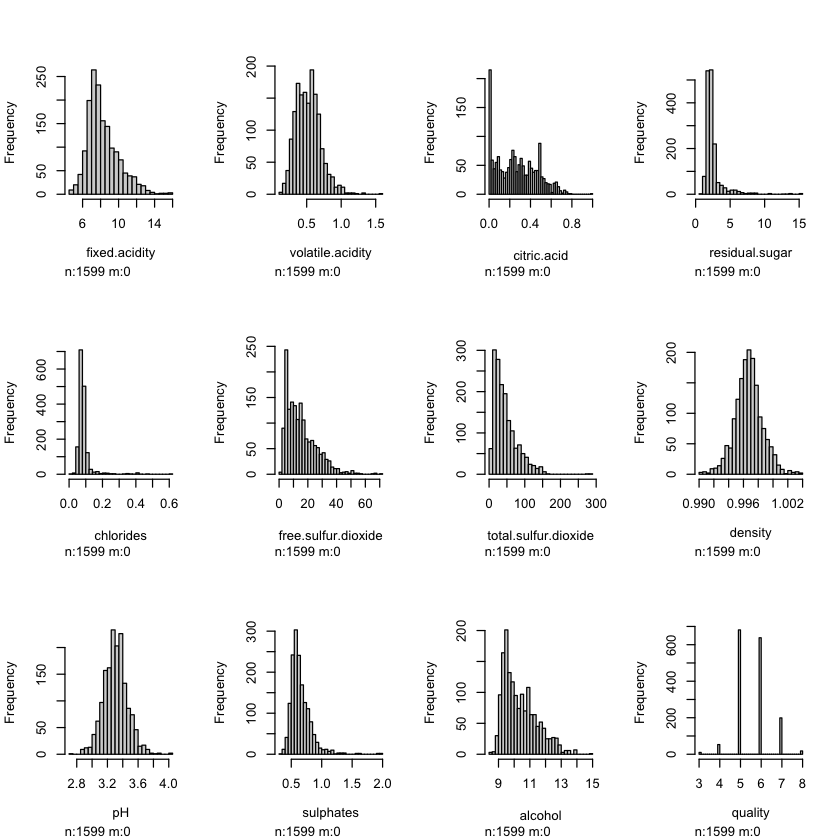

In [4]:
library(Hmisc)
hist.data.frame(wine)

Not all variables are normally distributed

### Check Correlations

Use Pearson's Correlation Coefficient to check for correlations between the continuous-valued independent variables.


The downloaded binary packages are in
	/var/folders/zr/9gkyxgqs2hg9bcxf3kp2zzr00000gn/T//RtmpM02Lgi/downloaded_packages


corrplot 0.95 loaded



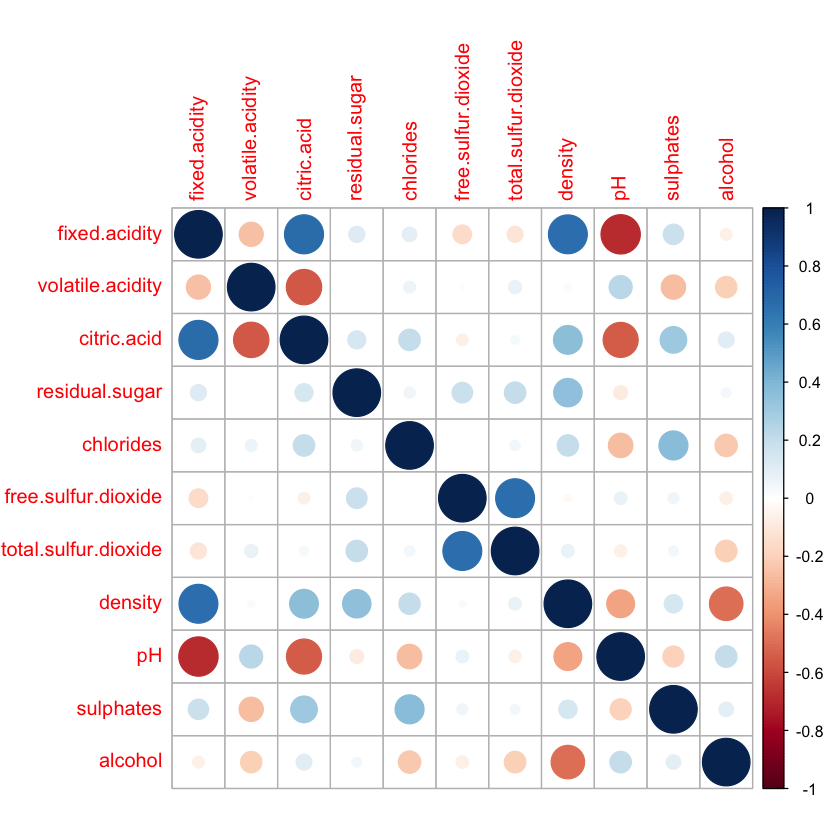

In [5]:
install.packages("corrplot")
library(corrplot)

corrplot(cor(wine[, !(colnames(wine) == "quality")]))

In [6]:
cor(wine[, !(colnames(wine) == "quality")])

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
fixed.acidity,1.00000000,-0.256130895,0.67170343,0.114776724,0.093705186,-0.153794193,-0.11318144,0.66804729,-0.68297819,0.183005664,-0.06166827
volatile.acidity,-0.25613089,1.000000000,-0.55249568,0.001917882,0.061297772,-0.010503827,0.07647000,0.02202623,0.23493729,-0.260986685,-0.20228803
citric.acid,0.67170343,-0.552495685,1.00000000,0.143577162,0.203822914,-0.060978129,0.03553302,0.36494718,-0.54190414,0.312770044,0.10990325
residual.sugar,0.11477672,0.001917882,0.14357716,1.000000000,0.055609535,0.187048995,0.20302788,0.35528337,-0.08565242,0.005527121,0.04207544
chlorides,0.09370519,0.061297772,0.20382291,0.055609535,1.000000000,0.005562147,0.04740047,0.20063233,-0.26502613,0.371260481,-0.22114054
free.sulfur.dioxide,-0.15379419,-0.010503827,-0.06097813,0.187048995,0.005562147,1.000000000,0.66766645,-0.02194583,0.07037750,0.051657572,-0.06940835
total.sulfur.dioxide,-0.11318144,0.076470005,0.03553302,0.203027882,0.047400468,0.667666450,1.00000000,0.07126948,-0.06649456,0.042946836,-0.20565394
density,0.66804729,0.022026232,0.36494718,0.355283371,0.200632327,-0.021945831,0.07126948,1.00000000,-0.34169933,0.148506412,-0.49617977
pH,-0.68297819,0.234937294,-0.54190414,-0.085652422,-0.265026131,0.070377499,-0.06649456,-0.34169933,1.00000000,-0.196647602,0.20563251
sulphates,0.18300566,-0.260986685,0.31277004,0.005527121,0.371260481,0.051657572,0.04294684,0.14850641,-0.19664760,1.000000000,0.09359475


Some independent variables are correlated with eachother. This may cause problems with model buidling.

## Prepare Data for Model

### Convert the quality values into factors

In [7]:
wine$quality <- as.ordered(wine$quality)

###  Split Data Into Training and Testing

In [8]:
set.seed(42)
samp <- sample(nrow(wine), 0.8 * nrow(wine))
train <- wine[samp, ]
test <- wine[-samp, ]

## Build Model

In [14]:
library(randomForest)
model <- randomForest(quality ~ ., data = train, ntree = 2001, mtry = 5, Importance = TRUE)
model


Call:
 randomForest(formula = quality ~ ., data = train, ntree = 2001,      mtry = 5, Importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 2001
No. of variables tried at each split: 5

        OOB estimate of  error rate: 31.82%
Confusion matrix:
  3 4   5   6  7 8 class.error
3 0 1   6   1  0 0   1.0000000
4 1 0  31  11  1 0   1.0000000
5 1 1 424 115  3 0   0.2205882
6 0 0 111 377 29 0   0.2707930
7 0 0   8  74 69 2   0.5490196
8 0 0   0   6  5 2   0.8461538

### Variable Importance

In [15]:
variable.importance <- data.frame(importance(model), rep(NA))
# Sort by MeanDecreaseGini
variable.importance <- variable.importance[order(variable.importance$MeanDecreaseGini, decreasing = TRUE), ]
variable.importance <- subset(variable.importance, select = c(MeanDecreaseGini))

variable.importance

,MeanDecreaseGini
,<dbl>
alcohol,124.47004
sulphates,92.82643
total.sulfur.dioxide,87.97472
volatile.acidity,84.79906
density,71.77015
chlorides,66.99648
pH,60.63749
residual.sugar,60.16448
fixed.acidity,58.95878


MeanDecreaseGini measures the average amount (accross all decision trees) that grouping the remaining wine samples on a particular variable reduces the level of impurity (or degree to which the samples have different outcomes). This can be interpreted as a measure of the importance of each variable in determining (or helping to determine) the correct outcome of each sample.

## Model Performance

In [24]:
predictions <- predict(model, newdata = test)
result <- data.frame(test$quality, predictions)
head(result)

,test.quality,predictions
,<ord>,<fct>
5,5,5
9,7,6
20,6,5
23,5,5
29,5,5
34,6,5


In [23]:
sum(as.integer(result$test.quality)==as.integer(result$predictions)) / nrow(result)

[1] 0.725

This model ran on our test data set with a 72.5% accuracy.

## Conclusion and Next Steps

For a quick and simple model, operating at 72.5% accuracy is relatively high given that there are 6 possible outcome classes - accuracy is 72%, but the model does a poor job of correctly classifying the extreme wine qualities. The model did not capture any of the 3, 4, or 8 wine qualities (sensitivity = 0% for those classes). Performance is high for the 5 and 6 wine qualities and good for the 7 wine quality. This behaviour is likely due to the relative distributions of the wine qualities in the data - if the model were to always guess that the wine quality is 5 or 6, it would be correct a large portion of the time. 

Some next steps for further analysis and model improvement could be:
 - Tinkering with mtry and ntree parameters of the random forest
 - Creating class weights
 - Studying the outcome distributions
 - Making variable selections based off of MDGini